In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
ad=pd.read_csv('advertising.csv')

In [3]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
ad['Ad Topic Line'].value_counts()

Future-proofed methodical protocol                         1
Future-proofed holistic superstructure                     1
Configurable coherent function                             1
Programmable uniform website                               1
Distributed intangible database                            1
Vision-oriented human-resource synergy                     1
Balanced uniform algorithm                                 1
Balanced mobile Local Area Network                         1
Upgradable local migration                                 1
Open-source 5thgeneration leverage                         1
Operative multi-tasking Graphic Interface                  1
Organic 3rdgeneration encryption                           1
Open-source global strategy                                1
Phased analyzing emulation                                 1
Virtual context-sensitive support                          1
Stand-alone radical throughput                             1
Multi-tiered multi-state

In [10]:
ad['Country'].describe()

count               1000
unique               237
top       Czech Republic
freq                   9
Name: Country, dtype: object

In [9]:
ad['City'].value_counts()

Lisamouth                  3
Williamsport               3
East Timothy               2
Shelbyport                 2
East John                  2
Lake James                 2
Pamelamouth                2
New Jessicaport            2
Wrightburgh                2
Lake Patrick               2
Port Julie                 2
North Daniel               2
Robertfurt                 2
Michelleside               2
New Sheila                 2
Joneston                   2
Johnstad                   2
West Shannon               2
Port Juan                  2
Lake Jose                  2
Millerbury                 2
Millertown                 2
West Steven                2
Lake Susan                 2
Benjaminchester            2
West Amanda                2
Lake David                 2
South Lisa                 2
Port Jason                 2
Jacquelineshire            1
Port Erinberg              1
Coffeytown                 1
Sanchezmouth               1
Port Susan                 1
Richardsontown

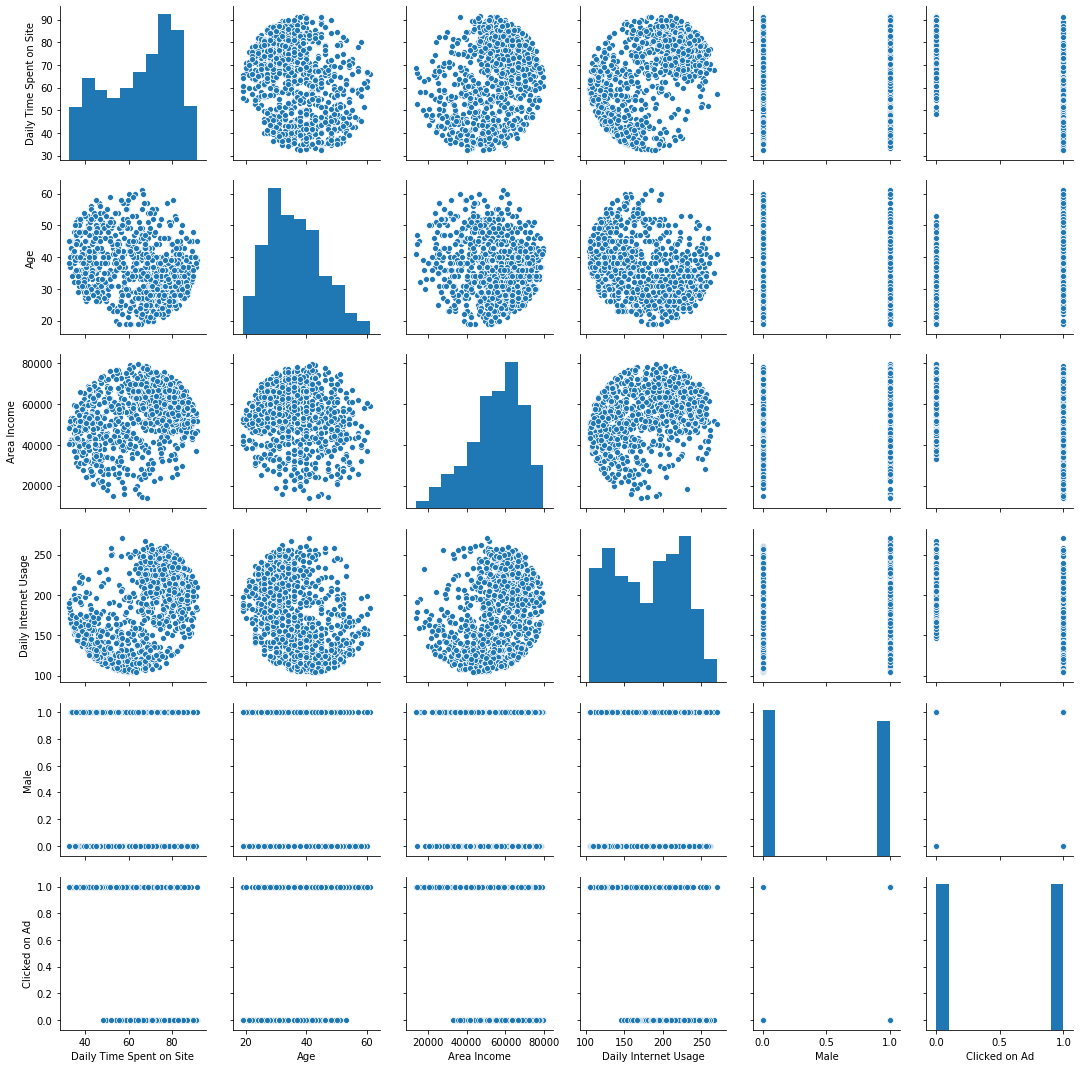

In [11]:
sns.pairplot(ad)

(array([12.,  6., 32., 21., 27., 70., 48., 87., 60., 38., 82., 39., 86.,
        37., 30., 68., 26., 44., 30., 18., 29., 18., 32., 15., 10., 16.,
         2., 10.,  2.,  5.]),
 array([19. , 20.4, 21.8, 23.2, 24.6, 26. , 27.4, 28.8, 30.2, 31.6, 33. ,
        34.4, 35.8, 37.2, 38.6, 40. , 41.4, 42.8, 44.2, 45.6, 47. , 48.4,
        49.8, 51.2, 52.6, 54. , 55.4, 56.8, 58.2, 59.6, 61. ]),
 <a list of 30 Patch objects>)

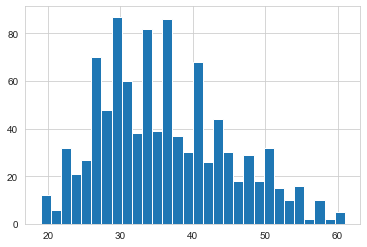

In [14]:
sns.set_style('whitegrid')
plt.hist(ad['Age'],bins=30)

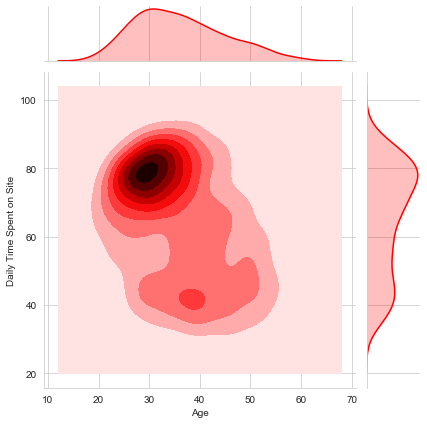

In [17]:
sns.jointplot(data=ad,x='Age',y='Daily Time Spent on Site',kind='kde',color='red')

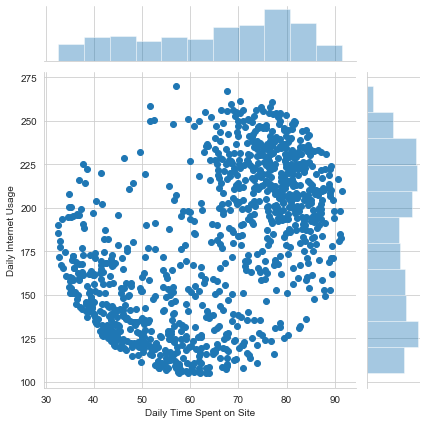

In [21]:
sns.jointplot(data=ad,y='Daily Internet Usage',x='Daily Time Spent on Site',kind='scatter')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


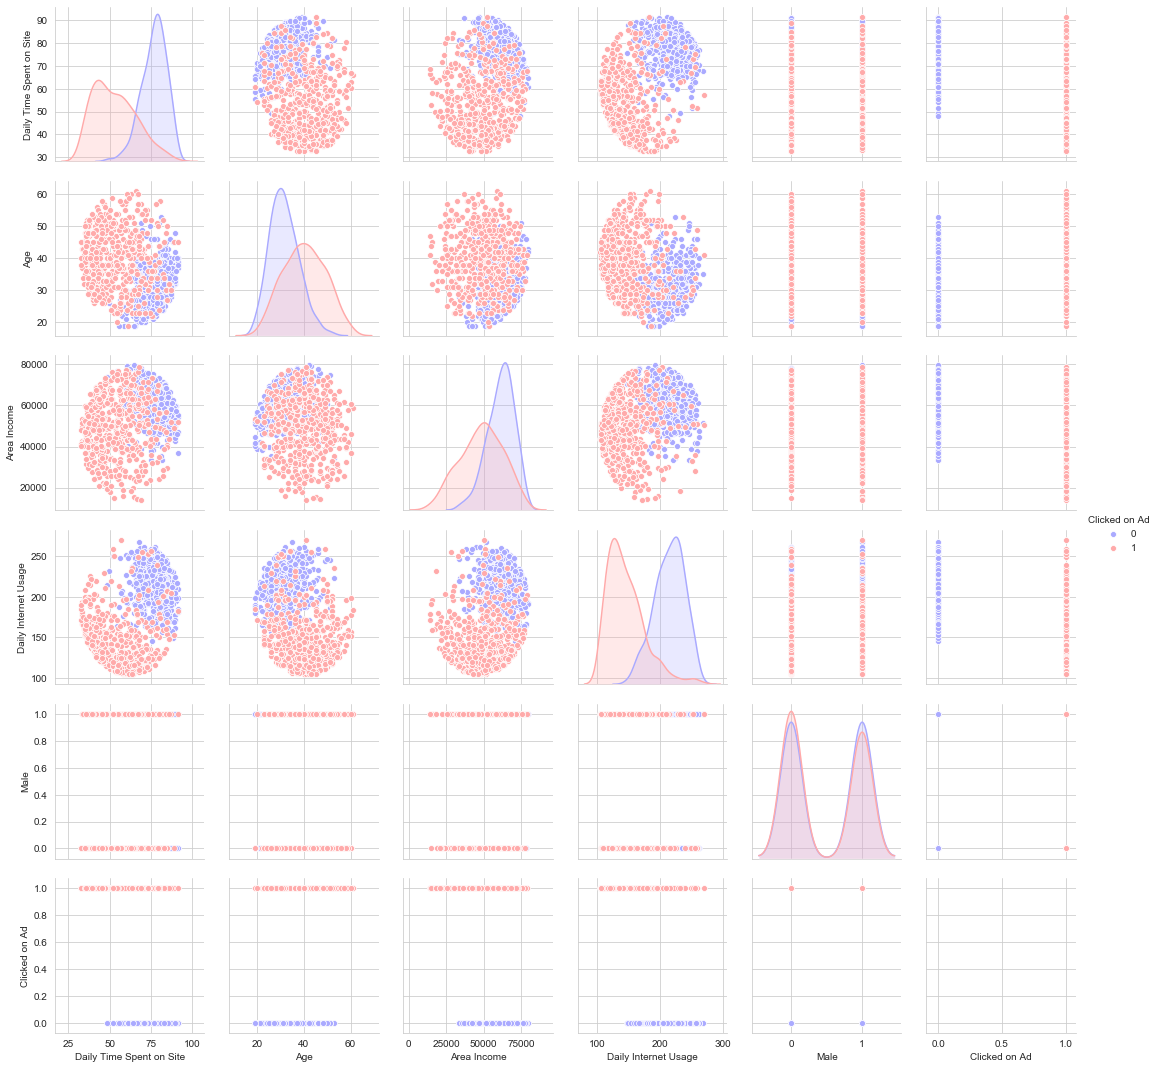

In [23]:
sns.pairplot(ad,hue='Clicked on Ad',palette='bwr')

(6.0, 0.0)

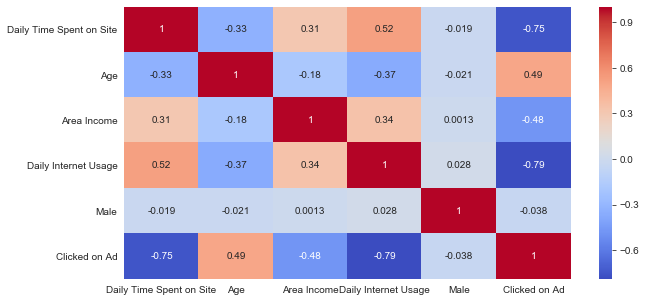

In [33]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(ad.corr(), annot=True,cmap='coolwarm') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [34]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [35]:
ad.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [36]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X=ad.drop('Clicked on Ad',axis=1)
y=ad['Clicked on Ad']

In [41]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
pred=lr.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[156   6]
 [ 24 144]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [ ]:
ad_test=pd.DataFrame({'y_test':y_test,'pred'})